Lets convert a shapefile to a raster based on a value in a field.

Inspect the data in QGIS/GIS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## some imports
import numpy as np
from osgeo import ogr, gdal_array
import gdal
import matplotlib.pyplot as plt

In [ ]:


# open shapefile
dataset = ogr.Open('training.shp')

layer = dataset.GetLayerByIndex(0)

## open the image
raster_ds = gdal.Open('South_coast.tif', gdal.GA_ReadOnly)

# Fetch number of rows and columns & projection and extent
ncol = raster_ds.RasterXSize
nrow = raster_ds.RasterYSize
proj = raster_ds.GetProjectionRef()
ext = raster_ds.GetGeoTransform()

raster_ds = None

# Create the raster
driver = gdal.GetDriverByName('GTiff')

out_raster_ds = driver.Create('training_mask.gtif', ncol, nrow, 1, gdal.GDT_Byte)


# Set the set projection and extents
out_raster_ds.SetProjection(proj)
out_raster_ds.SetGeoTransform(ext)

# Fill our output band with the 0 
nodata = out_raster_ds.GetRasterBand(1)
nodata.Fill(0)

gdal.RasterizeLayer(out_raster_ds,[1],layer,None, None, [0], ['ALL_TOUCHED=TRUE', 'ATTRIBUTE=ID'])

# Close dataset
out_raster_ds = None


Let's take a look at the classes - we need numpy

In [ ]:
## open the mask we created
mask_ds = gdal.Open('training_mask.gtif', gdal.GA_ReadOnly)

mask = mask_ds.GetRasterBand(1).ReadAsArray()
print("Image Shape ", mask.shape)

# pixels in each class?
classes = np.unique(mask)
print(classes)
print()

# Iterate over all class labels in the image, printing out some information
lspixel = []
for data in classes:
    maskpixels = (mask == data).sum()
    print("class contains:")
    print(maskpixels)
    lspixel.append(maskpixels)

print("class 0 contains: ", lspixel[0])
print("class 1 (water AOI) contains: ", lspixel[1]) 

## Think about how could we get all the classes?
for i in range(0,len(lspixel)):
    print(lspixel[i], "pixels in class", i)

print()

## remember the better practice?
for i, data in enumerate(classes):
    maskpixels = (mask == data).sum()
    print("class " + str(i) + " contains " + str(maskpixels) + " pixels")


Image Shape  (519, 751)
[0 1 2 3 4 5 6 7]

class contains:
367825
class contains:
10261
class contains:
5202
class contains:
2428
class contains:
2951
class contains:
541
class contains:
242
class contains:
319
class 0 contains:  367825
class 1 (water AOI) contains:  10261
367825 pixels in class 0
10261 pixels in class 1
5202 pixels in class 2
2428 pixels in class 3
2951 pixels in class 4
541 pixels in class 5
242 pixels in class 6
319 pixels in class 7

class 0 contains 367825 pixels
class 1 contains 10261 pixels
class 2 contains 5202 pixels
class 3 contains 2428 pixels
class 4 contains 2951 pixels
class 5 contains 541 pixels
class 6 contains 242 pixels
class 7 contains 319 pixels


Plot this rasterized shapefile

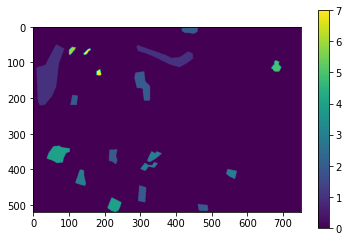

In [ ]:
%matplotlib inline   

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

## open the mask again
mask_ds = gdal.Open('training_mask.gtif', gdal.GA_ReadOnly)

mask = mask_ds.GetRasterBand(1).ReadAsArray().astype(np.uint8)

#### show the data
plt.imshow(mask)
plt.colorbar() ## more here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colorbar.html
plt.show()

In [ ]:
n_samples = (mask > 0).sum()
print ("number of samples", n_samples)

number of samples 21944


Remember the river mask data sheet... similar thing going on here!